In [78]:
import itertools
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

import statsmodels.api as sm

In [2]:
# Read CPI dataset
# Consumer Price Index for All Urban Consumers: All Items
# Citation:
# U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items [CPIAUCSL], 
# retrieved from FRED, Federal Reserve Bank of St. Louis;
# https://fred.stlouisfed.org/series/CPIAUCSL, January 4, 2019.

In [63]:
df = pd.read_csv("./data/CPIAUCSL.csv", index_col=0, parse_dates=True)
# df["DATE"] = pd.to_datetime(df["DATE"])
df.columns = ["CPI"]
print(df.dtypes)
df.head()
# month_df = df.resample("M").mean().head()

CPI    float64
dtype: object


,CPI
DATE,
1947-02-01,21.62
1947-03-01,22.00
1947-04-01,22.00
1947-05-01,21.95
1947-06-01,22.08


In [69]:
# 1st order differencing.
d1 = df.diff()
d1.dropna(inplace=True)
d1.head()

,CPI
DATE,
1947-03-01,0.38
1947-04-01,0.00
1947-05-01,-0.05
1947-06-01,0.13
1947-07-01,0.15


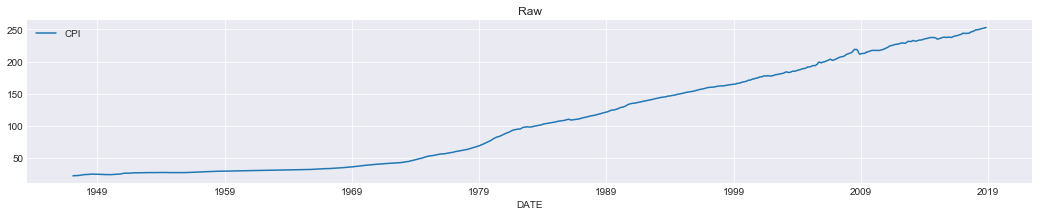

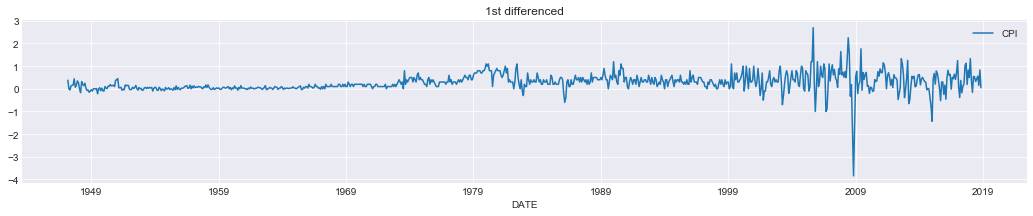

In [75]:
df.plot(figsize=(18, 3), grid=True)
plt.title("Raw")
plt.show()
d1.plot(figsize=(18, 3), grid=True)
plt.title("1st differenced")
plt.show()

<Figure size 1296x432 with 0 Axes>

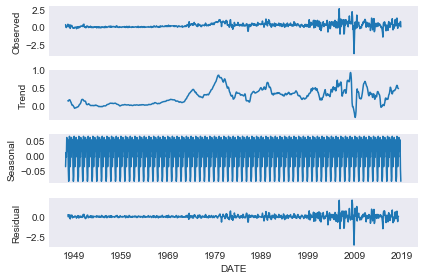

In [82]:
from pylab import rcParams
rcParams 
decomposition = sm.tsa.seasonal_decompose(d1, model="additive")
fig = decomposition.plot()
plt.show()